#### Import the Necessary Libraries

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### Load the Dataset

In [93]:
df = pd.read_csv('customer_churn.csv')

#### Exploratory Data Analysis

In [126]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_0,InternetService_DSL,InternetService_Fiber optic
0,1,0,1,0,1,0,0,0,1,0,...,0,0,1,2,29.85,29.85,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,0,1,0,3,56.95,1889.50,0,0,1,0
2,0,0,0,0,2,1,0,1,1,0,...,0,0,1,3,53.85,108.15,1,0,1,0
3,0,0,0,0,45,0,0,1,0,1,...,0,1,0,0,42.30,1840.75,0,0,1,0
4,1,0,0,0,2,1,0,0,0,0,...,0,0,1,2,70.70,151.65,1,0,0,1


In [95]:
df.shape

(7043, 21)

In [96]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### Data Cleaning

In [97]:
df.drop('customerID',axis= 1, inplace=True)

In [98]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [99]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [100]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [101]:
df = df[df.TotalCharges!=' ']

In [102]:
df.shape

(7032, 20)

In [103]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [104]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14364\3612871430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.TotalCharges = pd.to_numeric(df.TotalCharges)


In [105]:
df.TotalCharges.dtypes

dtype('float64')

In [108]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column} : {df[column].unique()}')

In [109]:
print_unique_col_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [110]:
df.replace('No internet service','No',inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14364\1089326532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('No internet service','No',inplace=True)


In [111]:
df.replace('No phone service','No',inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14364\1924825713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('No phone service','No',inplace=True)


In [112]:
print_unique_col_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


#### Data Visualization

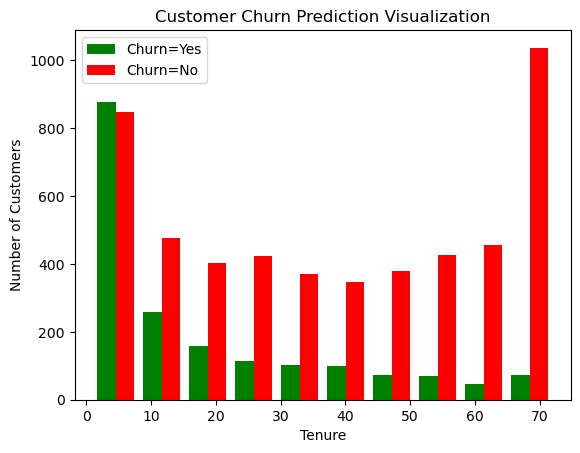

In [106]:
tenure_churn_no = df[df.Churn =='No'].tenure
tenure_churn_yes = df[df.Churn =='Yes'].tenure

plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([tenure_churn_yes,tenure_churn_no], color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

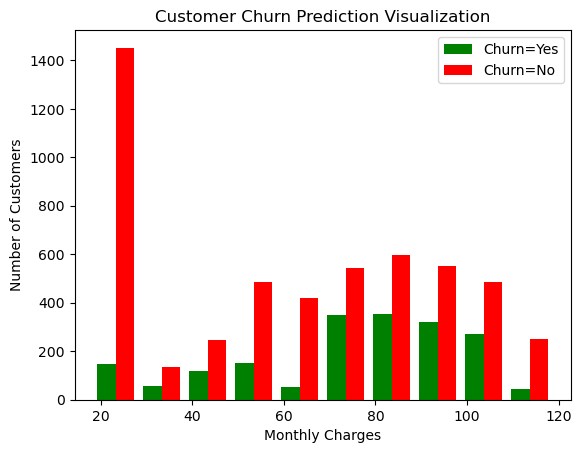

In [107]:
mc_churn_no = df[df.Churn =='No'].MonthlyCharges
mc_churn_yes = df[df.Churn =='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([mc_churn_yes,mc_churn_no], color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

#### Label Encoding

In [114]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

In [115]:
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14364\490338898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].replace({'Yes': 1,'No': 0},inplace=True)


In [116]:
for column in df:
    print(f'{column} : {df[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 0]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [117]:
df['gender'].replace({'Female': 1,'Male': 0},inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14364\1844397334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'].replace({'Female': 1,'Male': 0},inplace=True)


In [118]:
for column in df:
    print(f'{column} : {df[column].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 0]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [119]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Contract"] = le.fit_transform(df["Contract"])
df

C:\Users\DELL\AppData\Local\Temp\ipykernel_14364\990175654.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Contract"] = le.fit_transform(df["Contract"])


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,0,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,1,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,0,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,1,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,0,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,DSL,1,0,1,1,1,1,1,1,Mailed check,84.80,1990.50,0
7039,1,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,1,1,Credit card (automatic),103.20,7362.90,0
7040,1,0,1,1,11,0,0,DSL,1,0,0,0,0,0,0,1,Electronic check,29.60,346.45,0
7041,0,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,0,1,Mailed check,74.40,306.60,1


In [120]:
unique_classes = list(le.classes_)
for label, class_name in enumerate(unique_classes):
    print(f"Label {label} is assigned to class: {class_name}")

Label 0 is assigned to class: Month-to-month
Label 1 is assigned to class: One year
Label 2 is assigned to class: Two year


In [121]:
df["PaymentMethod"] = le.fit_transform(df["PaymentMethod"])
df

C:\Users\DELL\AppData\Local\Temp\ipykernel_14364\3911708264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PaymentMethod"] = le.fit_transform(df["PaymentMethod"])


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,DSL,1,0,1,1,1,1,1,1,3,84.80,1990.50,0
7039,1,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,1,1,1,103.20,7362.90,0
7040,1,0,1,1,11,0,0,DSL,1,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,0,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [122]:
unique_classes = list(le.classes_)
for label, class_name in enumerate(unique_classes):
    print(f"Label {label} is assigned to class: {class_name}")

Label 0 is assigned to class: Bank transfer (automatic)
Label 1 is assigned to class: Credit card (automatic)
Label 2 is assigned to class: Electronic check
Label 3 is assigned to class: Mailed check


In [123]:
df = pd.get_dummies(data=df,columns=['InternetService'])

In [124]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_0,InternetService_DSL,InternetService_Fiber optic
0,1,0,1,0,1,0,0,0,1,0,...,0,0,1,2,29.85,29.85,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,0,1,0,3,56.95,1889.50,0,0,1,0
2,0,0,0,0,2,1,0,1,1,0,...,0,0,1,3,53.85,108.15,1,0,1,0
3,0,0,0,0,45,0,0,1,0,1,...,0,1,0,0,42.30,1840.75,0,0,1,0
4,1,0,0,0,2,1,0,0,0,0,...,0,0,1,2,70.70,151.65,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,1,1,3,84.80,1990.50,0,0,1,0
7039,1,0,1,1,72,1,1,0,1,1,...,1,1,1,1,103.20,7362.90,0,0,0,1
7040,1,0,1,1,11,0,0,1,0,0,...,0,0,1,2,29.60,346.45,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,0,1,3,74.40,306.60,1,0,0,1


In [125]:
df.dtypes

gender                           int64
SeniorCitizen                    int64
Partner                          int64
Dependents                       int64
tenure                           int64
PhoneService                     int64
MultipleLines                    int64
OnlineSecurity                   int64
OnlineBackup                     int64
DeviceProtection                 int64
TechSupport                      int64
StreamingTV                      int64
StreamingMovies                  int64
Contract                         int32
PaperlessBilling                 int64
PaymentMethod                    int32
MonthlyCharges                 float64
TotalCharges                   float64
Churn                            int64
InternetService_0                uint8
InternetService_DSL              uint8
InternetService_Fiber optic      uint8
dtype: object

#### Feature Scaling

In [127]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

In [128]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [131]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_0,InternetService_DSL,InternetService_Fiber optic
0,1,0,1,0,0.000000,0,0,0,1,0,...,0,0,1,2,0.115423,0.001275,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,0,1,0,3,0.385075,0.215867,0,0,1,0
2,0,0,0,0,0.014085,1,0,1,1,0,...,0,0,1,3,0.354229,0.010310,1,0,1,0


#### Separating Input & Output Data

In [132]:
x = df.drop('Churn',axis='columns')
y = df['Churn']

In [133]:
x.shape

(7032, 21)

In [134]:
y.shape

(7032,)

In [136]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=5)

In [137]:
x_train.shape

(5625, 21)

In [138]:
x_test.shape

(1407, 21)

In [139]:
len(x_train.columns)

21

#### Model Building

In [141]:
import tensorflow as tf
from tensorflow import keras

In [176]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(21,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

In [177]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [178]:
model.fit(x_train,y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5036 - accuracy: 0.7511
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4318 - accuracy: 0.7893
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4226 - accuracy: 0.7950
Epoch 4/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4195 - accuracy: 0.7954
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4158 - accuracy: 0.8021
Epoch 6/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4150 - accuracy: 0.8009
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4138 - accuracy: 0.8032
Epoch 8/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4120 - accuracy: 0.8048
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4102 - accuracy: 0.8064
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4102 - accura

176/176 [==============================] - 0s 3ms/step - loss: 0.3772 - accuracy: 0.8251
Epoch 82/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3770 - accuracy: 0.8272
Epoch 83/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3759 - accuracy: 0.8263
Epoch 84/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3761 - accuracy: 0.8277
Epoch 85/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3758 - accuracy: 0.8258
Epoch 86/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3746 - accuracy: 0.8263
Epoch 87/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3758 - accuracy: 0.8270
Epoch 88/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3749 - accuracy: 0.8258
Epoch 89/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3742 - accuracy: 0.8277
Epoch 90/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3750 - accuracy: 

In [180]:
model.evaluate(x_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4744 - accuracy: 0.7783


[0.47438034415245056, 0.778251588344574]

In [181]:
yp = model.predict(x_test)
yp

44/44 [==============================] - 0s 2ms/step


array([[0.36986315],
       [0.58147657],
       [0.00539351],
       ...,
       [0.73375744],
       [0.65243447],
       [0.5715365 ]], dtype=float32)

In [182]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [183]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [184]:
y_pred[:10]

[0, 1, 0, 1, 0, 1, 0, 0, 0, 0]

#### Classification Report

In [185]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, accuracy_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       999
           1       0.64      0.53      0.58       408

    accuracy                           0.78      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.77      0.78      0.77      1407



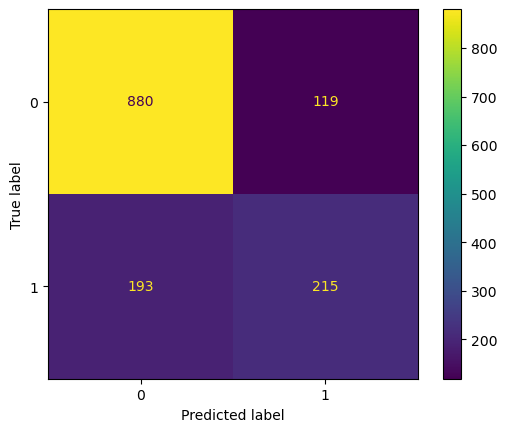

In [186]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [187]:
accuracy_score(y_test, y_pred)

0.7782515991471215